In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv("Superstore.csv", encoding="ISO-8859-1")

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.shape

(9994, 21)

### Data Cleaning

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Convert to Datetime

In [10]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Ship Date']= pd.to_datetime(df['Ship Date'])

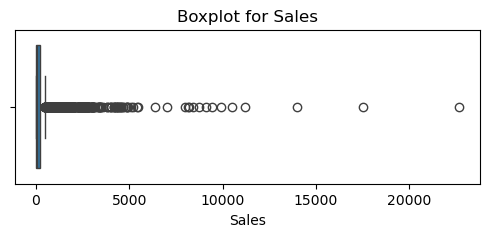

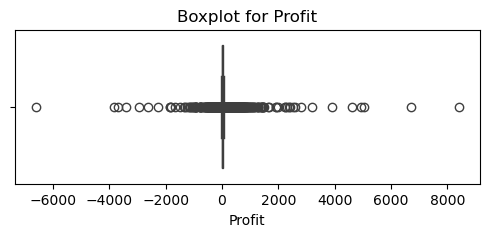

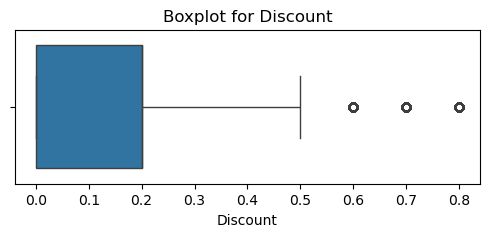

In [11]:
for col in ['Sales', 'Profit', 'Discount']:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### Handle Outiers

In [12]:
q_low = df['Profit'].quantile(0.01)
q_high = df['Profit'].quantile(0.99)
df_clean = df[(df['Profit'] > q_low) & (df['Profit'] < q_high)]

In [13]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['OrderY'] = df['Order Date'].dt.year
df['OrderM'] = df['Order Date'].dt.month

In [14]:
df['Discounted Sales'] = df['Sales'] * (1 - df['Discount'])
df['Sales per Quantity'] = df['Sales'] / df['Quantity']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

### Monthly Sales Tend

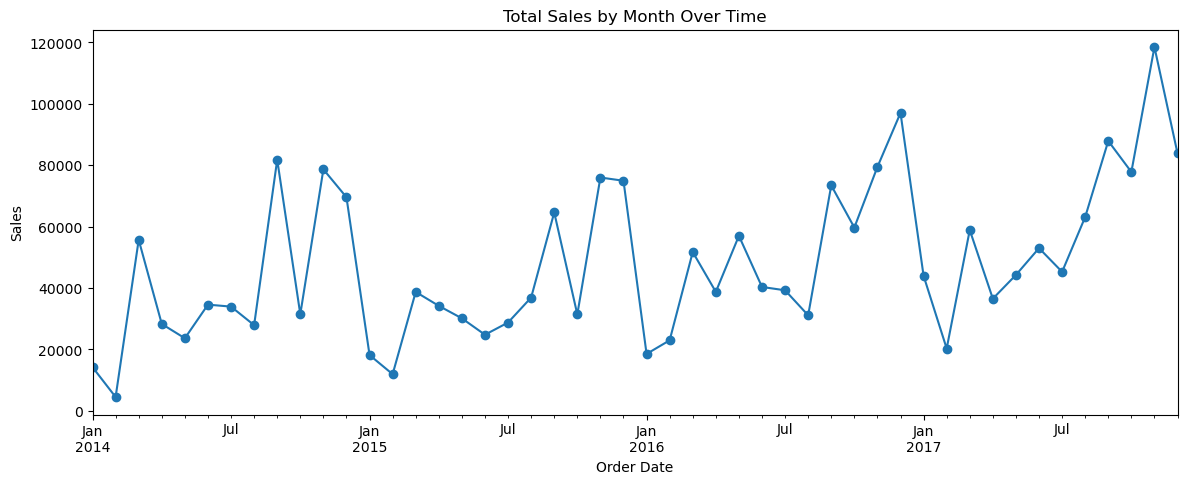

In [15]:
sales_month = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(14,5))
sales_month.plot(marker='o')
plt.title('Total Sales by Month Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

The monthly sales trend shows significant seasonality with clear peaks and troughs throughout the years. We observe pronounced sales spikes in December of each year, reaching record highs in December 2017. This pattern strongly suggests that end-of-year holiday promotions and campaigns are the primary drivers of sales growth.

Additionally, there are noticeable dips in sales during the spring and late summer months, indicating possible off-peak seasons where customer demand is lower.

Business Implication:

To capitalize on these trends, the company should invest more in marketing and stock preparation ahead of the holiday season to maximize profits.

For off-peak periods, launching targeted promotions or new product releases could help smooth out sales fluctuations and maintain steady revenue throughout the year.

C:\Users\ingal\AppData\Local\Temp\ipykernel_21440\3526230202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='Blues_r')


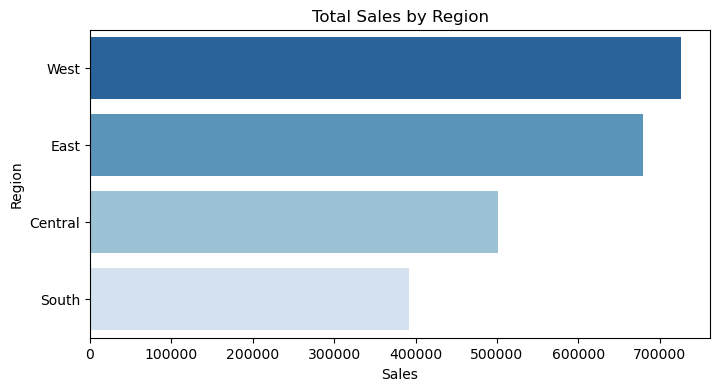

In [16]:
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='Blues_r')
plt.title('Total Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()

C:\Users\ingal\AppData\Local\Temp\ipykernel_21440\800589450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_States.values, y=top_States.index, palette='flare')


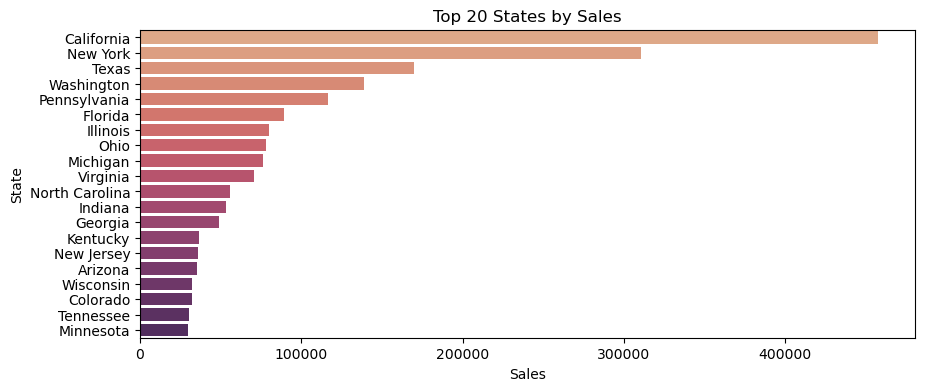

In [17]:
top_States = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_States.values, y=top_States.index, palette='flare')
plt.title('Top 20 States by Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

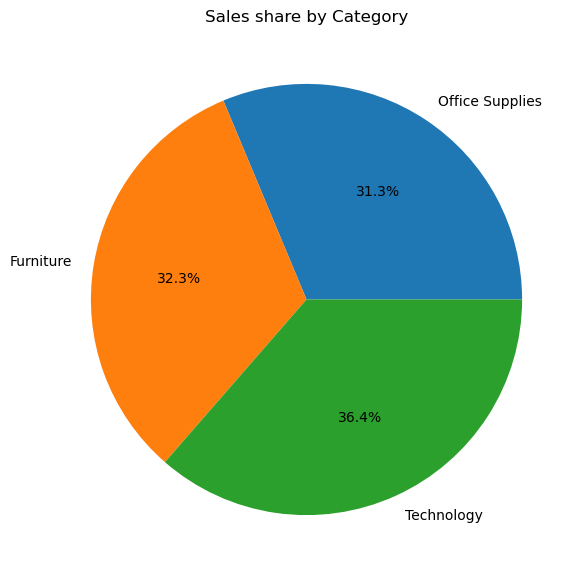

In [18]:
cat_sales = df.groupby('Category')['Sales'].sum().sort_values()
plt.figure(figsize=(10,7))
cat_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales share by Category')
plt.ylabel('')
plt.show()

In [19]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df.groupby('Order ID')['Sales'].sum().mean()
total_orders = df['Customer ID'].nunique()
unique_customers = df['Customer ID'].nunique()

print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Average Order Value: {avg_order_value:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Unique Customers: {unique_customers}")

Total Sales: 2,297,200.86
Total Profit: 286,397.02
Average Order Value: 458.61
Total Orders: 793
Unique Customers: 793


C:\Users\ingal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ingal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ingal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ingal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

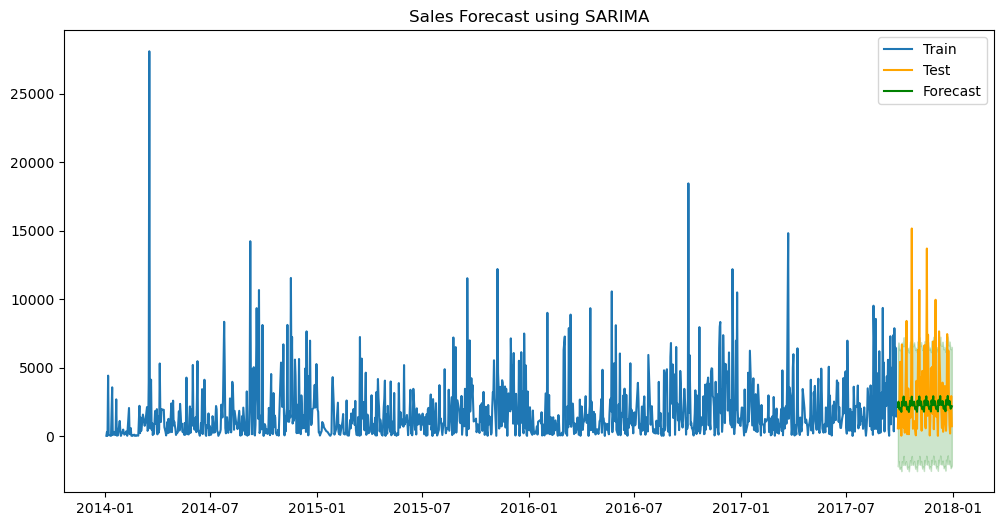

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Aggregate daily sales
sales_daily = df.groupby('Order Date')['Sales'].sum().reset_index()
sales_daily.set_index('Order Date', inplace=True)

# Train-test split
train = sales_daily.iloc[:-90]
test = sales_daily.iloc[-90:]

# Fit SARIMA model
model = SARIMAX(train['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Forecast
forecast = result.get_forecast(steps=90)
pred_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test', color='orange')
plt.plot(test.index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(test.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='green', alpha=0.2)
plt.legend()
plt.title("Sales Forecast using SARIMA")
plt.show()
